In [101]:
# import packages and data

import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from time import time
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_features = pd.read_csv('./x_val_features.csv')
val_labels = pd.read_csv('./y_val_labels.csv')
test_features = pd.read_csv('./x_test_features.csv')
test_labels = pd.read_csv('./y_test_labels.csv')

In [102]:
# import models

models = {}
for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GBM']:
    models[mdl] = joblib.load(f'./{mdl}_model.pkl')

In [103]:
# define functions

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy=round(accuracy_score(labels, pred), 3)
    precision=round(precision_score(labels, pred, average='micro'), 3)
    recall=round(recall_score(labels, pred, average='micro'), 3)
    print(f'Model: {name} -- Accuracy: {accuracy} | Precision: {precision} | Recall: {recall} | Latency {round((end-start)*1000,1)}ms')
    plot_conf_mat(model, features, labels)
    
    
def plot_conf_mat(model, features, labels):
    pred = model.predict(features)
    cm = confusion_matrix(labels, pred, labels=model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica'])
    
    disp.plot()
    plt.show()

Model: LR -- Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | Latency 2.0ms


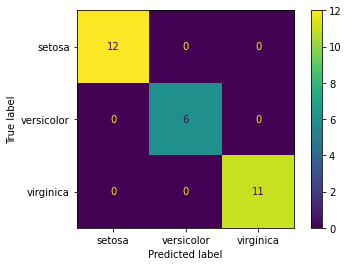

Model: SVM -- Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | Latency 0.8ms


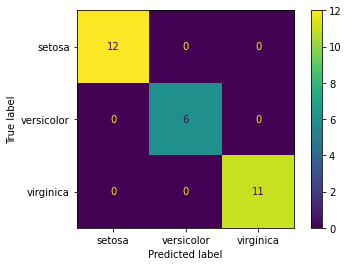

Model: MLP -- Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | Latency 2.9ms


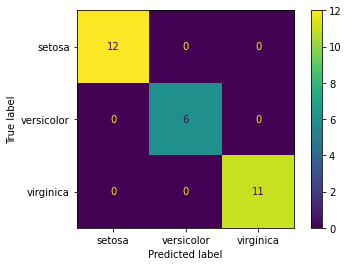

Model: RF -- Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | Latency 22.8ms


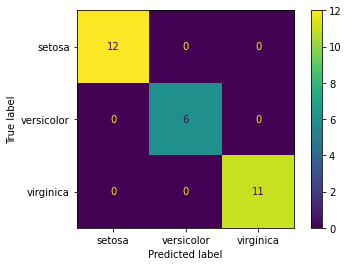

Model: GBM -- Accuracy: 1.0 | Precision: 1.0 | Recall: 1.0 | Latency 1.7ms


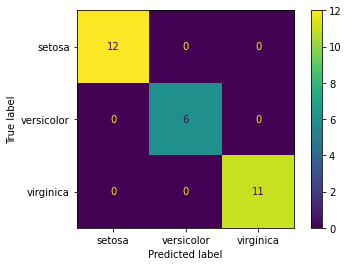

In [106]:
# validate models

for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

Model: Linear Regression -- Accuracy: 0.966 | Precision: 0.966 | Recall: 0.966 | Latency 1.9ms


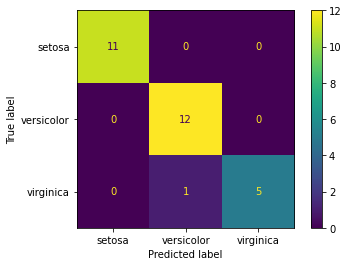

In [111]:
# evaluate best model on test set

evaluate_model('Linear Regression', models['LR'], test_features, test_labels)